# Project1 - 고양이 수염 스티커 만들기
## 1. 이미지 불러오고 RGB 이미지로 변환

In [33]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

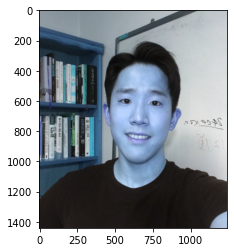

In [34]:
my_image_path = 'images/shlee.png' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

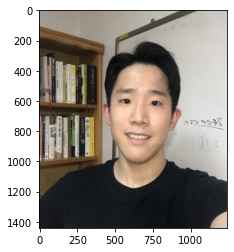

In [35]:
# RGB 이미지로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 2. 얼굴 검출

In [36]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(451, 502) (913, 965)]]


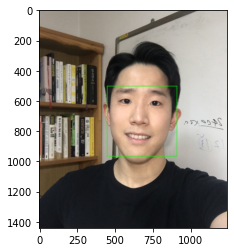

In [37]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 3. 랜드마크 검출

In [38]:
model_path = 'models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
# dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴

In [39]:
list_landmarks = []
# 랜드마크의 위치를 저장할 list 생성    

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


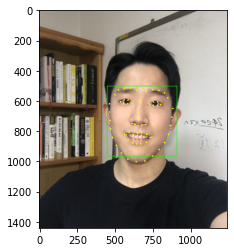

In [40]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 5, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 4. 스티커 적용위치 확인하기

In [41]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(451, 502) (913, 965)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [(466, 619), (466, 673), (470, 729), (473, 785), (486, 841), (512, 893), (545, 944), (588, 985), (643, 1002), (701, 997), (752, 964), (795, 921), (831, 875), (856, 821), (869, 763), (880, 707), (886, 650), (503, 559), (525, 528), (564, 517), (605, 517), (645, 529), (712, 536), (753, 527), (793, 531), (830, 547), (852, 580), (670, 599), (666, 639), (662, 678), (657, 718), (614, 749), (635, 755), (656, 763), (680, 759), (705, 757), (540, 605), (563, 593), (590, 594), (610, 613), (587, 618), (559, 616), (734, 622), (756, 606), (784, 606), (805, 623), (784, 631), (756, 629), (567, 819), (597, 808), (628, 804), (653, 813), (679, 809), (713, 821), (746, 839), (710, 873), (674, 884), (647, 884), (620, 878), (591, 857), (578, 824), (626, 822), (652, 827), (677, 827), (735, 841), (676, 858), (650, 858), (624, 851)]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] + dlib_rect.height()//2 # 이미지에서 코 부위의 y값 + 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (657, 950)
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(657, 718)
(x,y) : (657,950)
(w,h) : (463,463)


## 5. 스티커 적용하기

In [42]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(463) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(463, 463, 3)


In [43]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 657
# y는 이미지에서 코 부위의 y값 = 718
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 463
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 463
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y - h # 89-187 = -98
# 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다

(x,y) : (426,487)


In [46]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.
# 예제에서는 (344,0) 부터 (344+187, 0+89) 범위의 이미지를 의미합니다.
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_show[0:0+89, 344:344+187]
# img_show[0:89, 344:531]
# 즉, x좌표는 344~531 / y좌표는 0~89가 됨
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# 왕관 이미지에서 0이 나오는 부분은 흰색이라는 뜻, 즉 이미지가 없다는 소리임.
# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨
# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

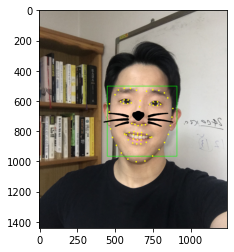

In [47]:
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

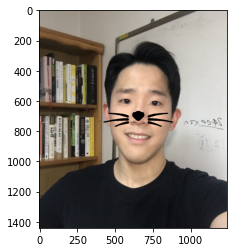

In [48]:
# 위에서 설명했으므로 생략
# 왕관 이미지
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

In [49]:
%reset
%who

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Interactive namespace is empty.


# Project2 - 문제점 찾기
## 1. 얼굴 각도에 따른 문제
사진을 30, 45, 60도 씩 회전하면서 각도에 따른 얼굴인식을 확인한다.

In [108]:
# 필요한 패키지 import 하기
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

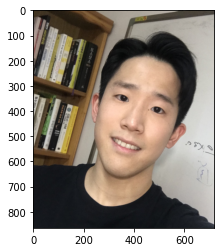

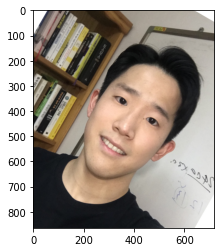

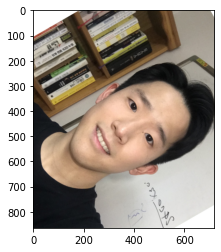

In [109]:
#이미지 파일 path를 리스트로 받아오고, 반복문을 통해 이미지를 RGB 변환 후 이미지 확인
my_image_paths = ['images/shlee-3.PNG', 'images/shlee-4.PNG', 'images/shlee-5.PNG']
my_image_list = []

for path in my_image_paths:
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    my_image_list.append(img_rgb)
    plt.imshow(img_rgb)
    plt.show()

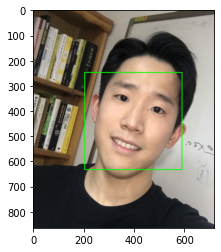

rectangles[[(204, 247) (589, 632)]]


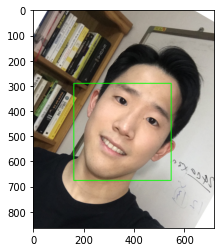

rectangles[[(161, 290) (546, 675)]]


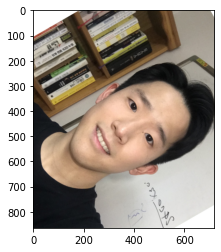

rectangles[]


In [110]:
#이미지 파일 path를 리스트로 받아오고, 반복문을 통해 이미지를 RGB 변환 후 이미지 확인

detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
dlib_rects_list=[]

for i in range(len(my_image_list)):
    dlib_rects_list.append(detector_hog(my_image_list[i], 1) )
    for dlib_rect in dlib_rects_list[i]:
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽
        
        cv2.rectangle(my_image_list[i], (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    plt.imshow(my_image_list[i])
    plt.show()
    print(dlib_rects_list[i])

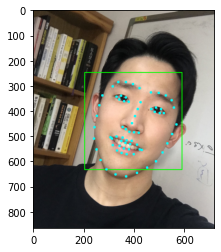

68


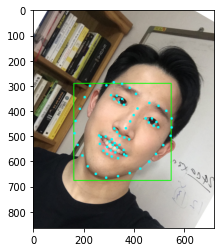

68


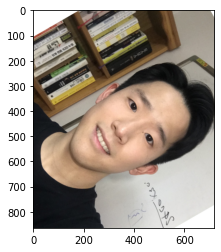

IndexError: list index out of range

In [111]:
model_path = 'models/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)
    
list_landmarks = []
# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for i in range(len(my_image_list)):
    
    for dlib_rect in dlib_rects_list[i]:
        points = landmark_predictor(my_image_list[i], dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장
        
        for point in list_landmarks[i]:
            cv2.circle(my_image_list[i], point, 5, (0, 255, 255), -1)
        
    plt.imshow(my_image_list[i])
    plt.show()
    print(len(list_landmarks[i]))


## 2. 이미지 밝기에 따른 문제점

In [112]:
%reset
%who

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Interactive namespace is empty.


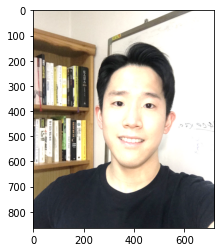

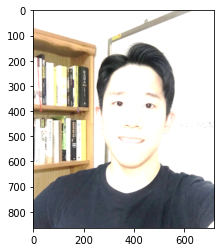

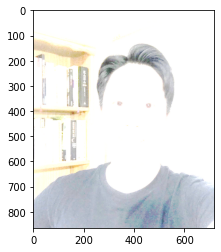

In [113]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

my_image_paths = ['images/shlee-b-1.PNG', 'images/shlee-b-2.PNG', 'images/shlee-b-3.PNG']
my_image_list = []

for path in my_image_paths:
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    my_image_list.append(img_rgb)
    plt.imshow(img_rgb)
    plt.show()

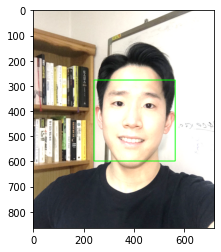

rectangles[[(241, 277) (562, 598)]]


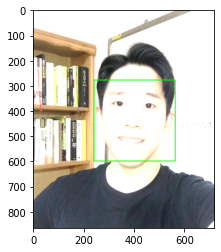

rectangles[[(241, 277) (562, 598)]]


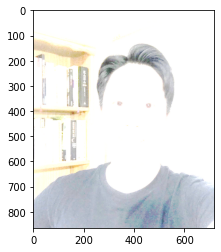

rectangles[]


In [114]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
dlib_rects_list=[]

for i in range(len(my_image_list)):
    dlib_rects_list.append(detector_hog(my_image_list[i], 1) )
    for dlib_rect in dlib_rects_list[i]:
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽
        
        cv2.rectangle(my_image_list[i], (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    plt.imshow(my_image_list[i])
    plt.show()
    print(dlib_rects_list[i])

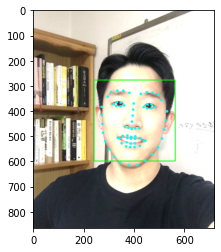

68


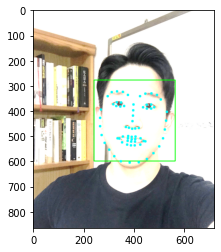

68


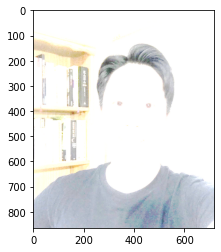

IndexError: list index out of range

In [115]:
model_path = 'models/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)
    
list_landmarks = []
# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for i in range(len(my_image_list)):
    
    for dlib_rect in dlib_rects_list[i]:
        points = landmark_predictor(my_image_list[i], dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장
        
        for point in list_landmarks[i]:
            cv2.circle(my_image_list[i], point, 5, (0, 255, 255), -1)
        
    plt.imshow(my_image_list[i])
    plt.show()
    print(len(list_landmarks[i]))

## 3. 이미지 크기에 따른 문제점

In [155]:
%reset
%who

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Interactive namespace is empty.


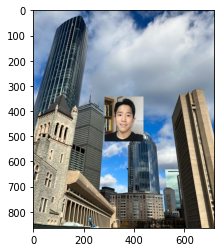

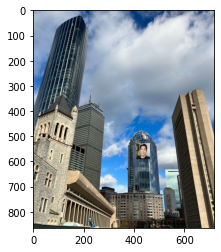

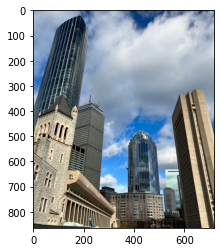

In [156]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 

my_image_paths = ['images/shlee-s-2.PNG', 'images/shlee-s-3.PNG', 'images/shlee-s-4.PNG']
my_image_list = []

for path in my_image_paths:
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    my_image_list.append(img_rgb)
    plt.imshow(img_rgb)
    plt.show()

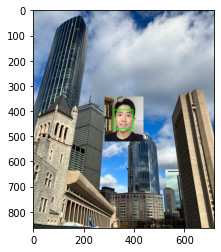

rectangles[[(320, 395) (395, 470)]]


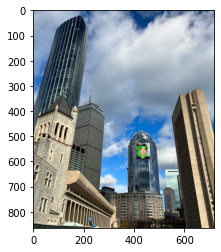

rectangles[[(417, 542) (453, 578)]]


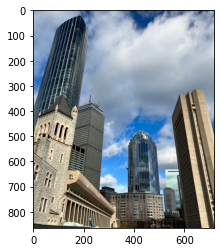

rectangles[]


In [157]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
dlib_rects_list=[]

for i in range(len(my_image_list)):
    dlib_rects_list.append(detector_hog(my_image_list[i], 1) )
    for dlib_rect in dlib_rects_list[i]:
        l = dlib_rect.left() # 왼쪽
        t = dlib_rect.top() # 위쪽
        r = dlib_rect.right() # 오른쪽
        b = dlib_rect.bottom() # 아래쪽
        
        cv2.rectangle(my_image_list[i], (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)
    plt.imshow(my_image_list[i])
    plt.show()
    print(dlib_rects_list[i])

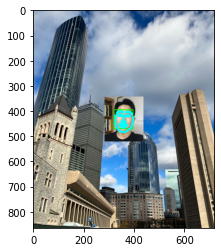

68


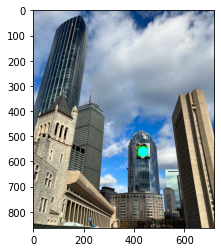

68


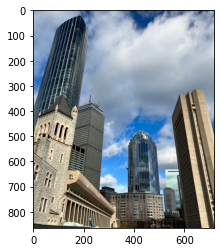

IndexError: list index out of range

In [158]:
model_path = 'models/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)
    
list_landmarks = []
# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for i in range(len(my_image_list)):
    
    for dlib_rect in dlib_rects_list[i]:
        points = landmark_predictor(my_image_list[i], dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
        list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장
        
        for point in list_landmarks[i]:
            cv2.circle(my_image_list[i], point, 5, (0, 255, 255), -1)
        
    plt.imshow(my_image_list[i])
    plt.show()
    print(len(list_landmarks[i]))

In [92]:
%reset
%who

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Interactive namespace is empty.


# Project3 - 사진의 회전 문제 해결하기
## 1. Landmark가 구해지도록 사진 회전시키기
앞의 문제점 분석에서 일정 각도이상으로 회전한 사진은 랜드마크 형성이 일어나지 않음.

In [114]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import random
import math

### 사진을 무작위 난수(1~360)의 각도로 회전시키기

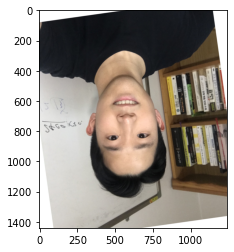

회전한 각도는?:  188


In [115]:
# 이미지 가져와서 RGB로 변환
my_image_path = 'images/shlee.png'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# 난수(random_angle)을 생성하며 난수만큼 사진을 회전시키기
random_angle = random.randrange(1, 361)

image_center = tuple(np.array(img_rgb.shape[1::-1]) / 2)
rot_mat = cv2.getRotationMatrix2D(image_center, random_angle, 1.0)
rotated_image = cv2.warpAffine(img_rgb, rot_mat, img_rgb.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))

plt.imshow(rotated_image) 
plt.show() 
print('회전한 각도는?: ', random_angle)

###  landmark가 형성이 가능한지 확인하고 가능할때까지 사진을 회전 20도 회전시키기

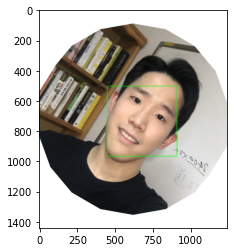

rectangles[[(451, 502) (913, 965)]]
140


In [116]:
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
rotated_angle = 0 # landmark 형성을 위해 회전시킨 각도

for i in range(20):
    dlib_rects = detector_hog(rotated_image, 1)
    if list(dlib_rects)==[]:
        rot_mat = cv2.getRotationMatrix2D(image_center, 20, 1.0)
        rotated_image = cv2.warpAffine(rotated_image, rot_mat, img_rgb.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
        rotated_angle += 20
    else:
        break
        
rotated_image_show = rotated_image.copy() #출력용 이미지 저장
        
for dlib_rect in dlib_rects:
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽
    cv2.rectangle(rotated_image, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(rotated_image)
plt.show()
print(dlib_rects)
print(rotated_angle)


68


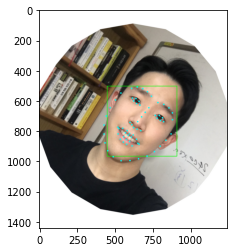

In [117]:
model_path = 'models/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)
    
list_landmarks = []


for dlib_rect in dlib_rects:
    points = landmark_predictor(rotated_image, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(rotated_image, point, 5, (0, 255, 255), -1)


plt.imshow(rotated_image)
plt.show()

## 2. 스티커를 알맞게 회전시켜 붙이기

(653, 737)
(x,y) : (653,737)
(w,h) : (463,463)
(463, 463, 3)


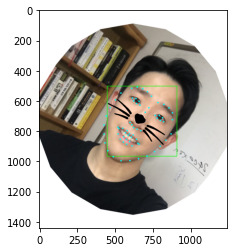

In [118]:
#스티커 붙일 위치 정하기 (30번은 코 중앙)
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0]
    y = landmark[30][1]
    w = h = dlib_rect.width()
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
#스티커를 회전한 얼굴만큼 회전시키기 위해, 코끝과 미간의 랜드마크를 통해 각도를 계산
dy = landmark[57][1] - landmark[27][1]
dx = landmark[57][0] - landmark[27][0]
sticker_angle = math.atan2(dx, dy) * (180.0 / math.pi)

#스티커 불러오기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

#계산한 각도만큼 스티커 회전하기
sticker_center = tuple(np.array(img_sticker.shape[1::-1]) / 2)
rot_mat2 = cv2.getRotationMatrix2D(sticker_center, sticker_angle, 1.0)
rotated_sticker = cv2.warpAffine(img_sticker, rot_mat2, img_sticker.shape[1::-1], flags=cv2.INTER_LINEAR, borderValue=(255,255,255))
rotated_sticker = cv2.resize(rotated_sticker, (int(w),int(h)))

#스티커 이미지에 붙이기
refined_x = int(x - w // 2)               
refined_y = int(y - rotated_sticker.shape[0]/2)

sticker_area = rotated_image[refined_y:refined_y+rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]]
rotated_image[refined_y:refined_y+rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]] = \
    np.where(rotated_sticker!=0,sticker_area,rotated_sticker).astype(np.uint8)

plt.imshow(rotated_image)
plt.show()

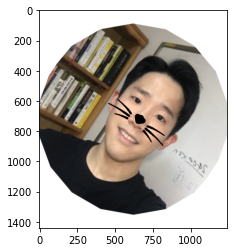

In [113]:
sticker_area = rotated_image_show[refined_y:refined_y+rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]]
rotated_image_show[refined_y:refined_y+rotated_sticker.shape[0], refined_x:refined_x+rotated_sticker.shape[1]] = \
    np.where(rotated_sticker!=0,sticker_area,rotated_sticker).astype(np.uint8)

plt.imshow(rotated_image_show)
plt.show()

### 문제점
1. 이미지를 회전시키면서 가장자리의 정보가 소실됨.
2. 랜드마크를 얻기위해 사진을 반복적으로 회전시키는 코드에서 부하가 있음.
3. 애매한 각도로 이미지가 회전할 경우, 랜드마크 얻기가 실패하는 경우가 있음.